mark

In [1]:
from tensorflow.signal import fft

from tensorflow.keras.layers import Lambda
from tensorflow.signal import fft, fft2d, fftshift, ifft2d, ifft2d

import tensorflow as tf

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

import numpy as np

import tensorflow.compat.v2 as tf
tf.enable_v2_behavior()

import tensorflow_datasets as tfds
import tensorflow_probability as tfp


tfk = tf.keras
tfkl = tf.keras.layers
tfpl = tfp.layers
tfd = tfp.distributions

# from skimage.transform import resize

from xrdc.source_separation import *
from skimage.transform import resize
from tensorflow.signal import fft2d, fftshift

N = 28
    
padx = pady = N // 2
def do_resize():
    #padx = pady = x.shape[1] // 2
    transform = tfkl.AveragePooling2D(2)
    padder = tfkl.ZeroPadding2D((padx // 2, padx // 2))
    return tfk.Sequential([
        transform,
        padder
    ])

def do_forward():
    sequential = do_resize()
    sequential.add(Lambda(lambda resized: (fft2d(
        tf.squeeze(tf.cast(resized, tf.complex64))
    ))))
    sequential.add(Lambda(lambda X: tf.math.real(tf.math.conj(X) * X) / N**2))
    sequential.add(Lambda(lambda psd: 
                          tf.expand_dims(
                              tf.math.sqrt(
            fftshift(psd, (-2, -1))
                                    ), 3)))
    return sequential

def resize(x):
    rmod = do_resize()
    rmod.compile(loss = 'mse')
    return rmod.predict(x)

rmod = do_forward()
rmod.compile(loss='mse')
#rmod.fit(x)

2022-09-02 01:22:37.773287: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-09-02 01:22:38.406316: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-09-02 01:22:38.406669: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-09-02 01:22:38.443258: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-02 01:22:38.443622: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:04:00.0 name: NVIDIA GeForce GTX 1660 SUPER computeCapability: 7.5
coreClock: 1.785GHz coreCount: 22 deviceMemorySize: 5.80GiB deviceMemoryBandwidth: 312.97GiB/s
2022-09-02 01:22:38.443631: I tensorflow/stream_executor/platf

In [2]:
from xrdc import fourier

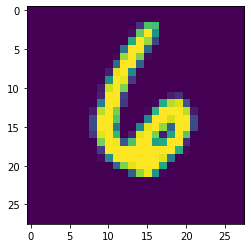

In [46]:
plt.imshow(np.array(x).squeeze()[0])

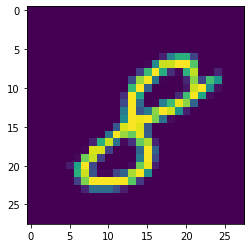

In [505]:
plt.imshow(np.array(x).squeeze()[3])

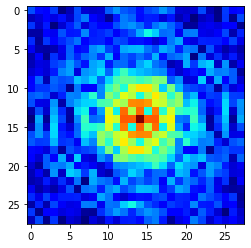

In [579]:
arg0 = fourier.fftshift(power(fourier.fft2((np.array(x).squeeze()[1]))))
plt.imshow(
    np.log(1 + arg0)
, cmap = 'jet')

In [667]:
tmp = ((fourier.fft2((np.array(x).squeeze()[1]))))

In [668]:
mask = (np.abs(fourier.fftfreq(28)) > .25)

In [662]:
tmp[mask, :] = 0

tmp[:, mask] = 0

from scipy.fftpack import ifftshift as sifftshift

In [669]:
tmp2 = (power(fourier.ifft2((tmp))))

In [670]:
tmp2.mean(), np.array(x).squeeze()[1].mean()

(0.22483566, 0.24898957)

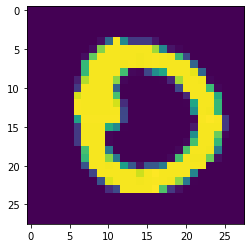

In [671]:
plt.imshow(tmp2)

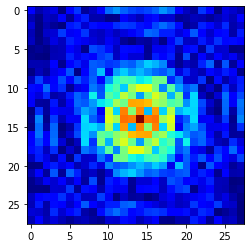

In [672]:
plt.imshow(np.log(4 + power(fourier.fftshift(fourier.fft2(tmp2)))), cmap = 'jet')

In [514]:
resize(x)

1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00


1/1 [==============================] - 0s 19ms/step - loss: 0.0000e+00


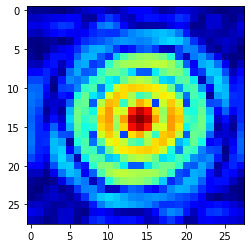

In [658]:
arg = fourier.fftshift(power(fourier.fft2((np.array(
        resize(x)
    ).squeeze()[1]))))
plt.imshow(
    np.log(1 + 
           arg
          )
, cmap = 'jet')

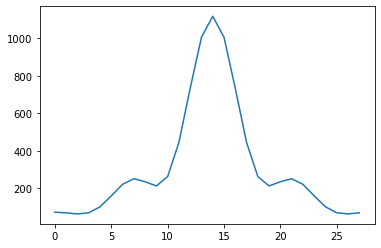

In [526]:
plt.plot(arg.sum(axis = 0))

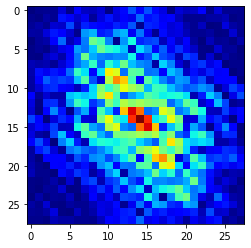

In [548]:
arg2 = fourier.fftshift(power(fourier.fft2((np.array(
        x
    ).squeeze()[3]))))
plt.imshow(
    np.log(4 + 
           arg2
          )
, cmap = 'jet')

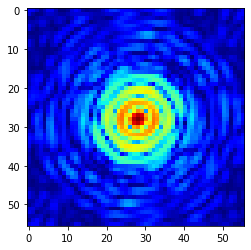

In [577]:
arg3 = fourier.fftshift(power(fourier.fft2(
    np.pad(np.array(x)[1].squeeze(), 14)
    )))

plt.imshow(
    np.log(4 + 
           arg3
          )
, cmap = 'jet')

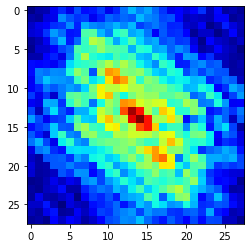

In [564]:
arg4 = arg3[0::2, 0::2] + arg3[0::2, 1::2] + arg3[1::2, 0::2] + arg3[1::2, 1::2]
plt.imshow(
    np.log(4 + 
           arg4
          )
, cmap = 'jet')

In [390]:
ifftshift

<function numpy.fft.ifftshift(x, axes=None)>

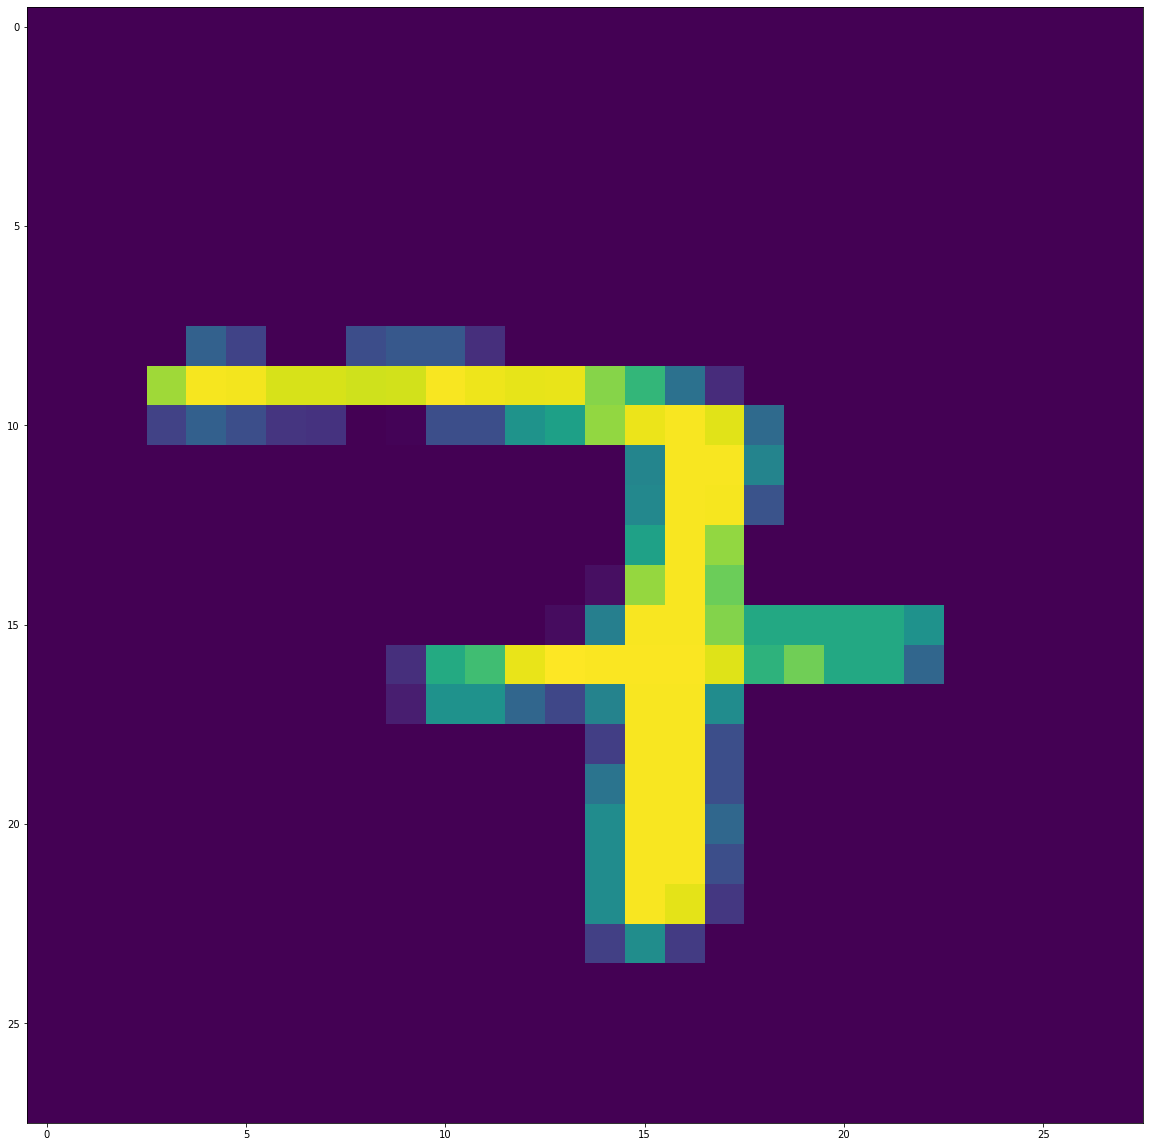

In [384]:
plt.imshow(np.array(x_orig)[3].squeeze())

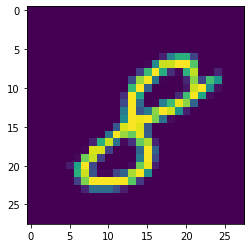

In [538]:
plt.imshow(np.array(x)[3].squeeze())

1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00


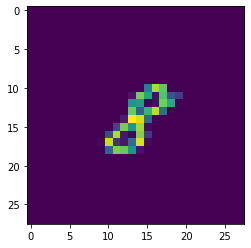

In [539]:
plt.imshow(np.array(resize(x))[3].squeeze())

In [535]:
np.sum(x)

1248.9922

In [533]:
np.sum(resize(x))

1/1 [==============================] - 0s 22ms/step - loss: 0.0000e+00


312.24805

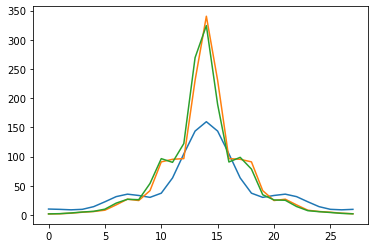

In [561]:
plt.plot(4 * arg.mean(axis = 0))
plt.plot(arg2.mean(axis = 0))
# plt.plot(arg3.mean(axis = 0))
plt.plot(arg4.mean(axis = 0) / 4)

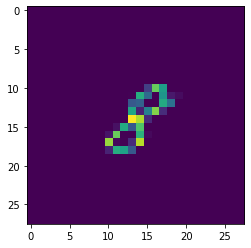

In [484]:
plt.imshow(power(np.array(rmod.predict(x)[3]).squeeze()))

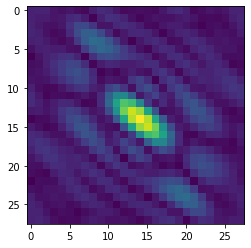

In [487]:
plt.imshow((np.array(rmod.predict(x)[3]).squeeze()))

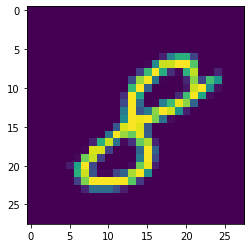

In [394]:
plt.imshow(np.array(x[3]).squeeze())

In [3]:
sys_details = tf.sysconfig.get_build_info()
cuda_version = sys_details["cuda_version"]
print(cuda_version)

10.1


In [4]:
cudnn_version = sys_details["cudnn_version"]  
print(cudnn_version)

7


In [5]:
# tf.debugging.set_log_device_placement(False)

In [3]:
datasets, datasets_info = tfds.load(name='mnist',
                                    with_info=True,
                                    as_supervised=False)

def _preprocess(sample):
    image = tf.cast(sample['image'], tf.float32) / 255.  # Scale to unit interval.
#     image = tf.squeeze(
#         do_forward(
#             image[None, ...]),
#         axis = 0)
    #image = image < tf.random.uniform(tf.shape(image))   # Randomly binarize.
    #image = tf.expand_dims(image, 0)
    #print(image.shape)

    rmod = do_forward()
    rmod.compile(loss='mse')
    orig = tf.identity(image)
    image = rmod(image)#rmod.predict(image)
    return image, image, orig

train_dataset = (datasets['train']
                 .batch(256)
                 .map(_preprocess)
                 .cache()
                 .prefetch(tf.data.AUTOTUNE)
                 .shuffle(int(10e3)))
eval_dataset = (datasets['test']
                .batch(256)
                .map(_preprocess)
                .cache()
                .prefetch(tf.data.AUTOTUNE))

1.0.0
Using ~/tensorflow_datasets/mnist/3.0.1 instead.


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [4]:
x = next(iter(eval_dataset))[0][:10]

2022-09-02 01:22:48.465878: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-09-02 01:22:48.483845: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3700365000 Hz
2022-09-02 01:22:48.617142: W tensorflow/core/kernels/data/cache_dataset_ops.cc:757] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2022-09-02 01:22:48.617311: W tensorflow/core/kernels/data/cache_dataset_ops.cc:757] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset will be discarded. This can happen if you have an inp

In [5]:
input_shape = datasets_info.features['image'].shape
encoded_size = 16
base_depth = 32

In [6]:
prior = tfd.Independent(tfd.Normal(loc=tf.zeros(encoded_size), scale=1),
                        reinterpreted_batch_ndims=1)

In [7]:
encoder = tfk.Sequential([
    tfkl.InputLayer(input_shape=input_shape),
    tfkl.Lambda(lambda x: tf.cast(x, tf.float32) - 0.5),
    tf.keras.layers.BatchNormalization(),
    tfkl.Conv2D(base_depth, 5, strides=1,
                padding='same', activation=tf.nn.leaky_relu),
    tfkl.Conv2D(base_depth, 5, strides=2,
                padding='same', activation=tf.nn.leaky_relu),
    tfkl.Conv2D(2 * base_depth, 5, strides=1,
                padding='same', activation=tf.nn.leaky_relu),
    tfkl.Conv2D(2 * base_depth, 5, strides=2,
                padding='same', activation=tf.nn.leaky_relu),
    tfkl.Conv2D(4 * encoded_size, 7, strides=1,
                padding='valid', activation=tf.nn.leaky_relu),
    tfkl.Flatten(),
    tfkl.Dense(tfpl.MultivariateNormalTriL.params_size(encoded_size),
               activation=None),
    tfpl.MultivariateNormalTriL(
        encoded_size,
        activity_regularizer=tfpl.KLDivergenceRegularizer(prior)),
])


Instructions for updating:
Do not pass `graph_parents`.  They will  no longer be used.


Instructions for updating:
Do not pass `graph_parents`.  They will  no longer be used.


In [8]:
decoder = tfk.Sequential([
    tfkl.InputLayer(input_shape=[encoded_size]),
    tfkl.Reshape([1, 1, encoded_size]),
    tf.keras.layers.BatchNormalization(),
    tfkl.Conv2DTranspose(2 * base_depth, 7, strides=1,
                         padding='valid', activation=tf.nn.leaky_relu),
    tfkl.Conv2DTranspose(2 * base_depth, 5, strides=1,
                         padding='same', activation=tf.nn.leaky_relu),
    tfkl.Conv2DTranspose(2 * base_depth, 5, strides=2,
                         padding='same', activation=tf.nn.leaky_relu),
    tfkl.Conv2DTranspose(base_depth, 5, strides=1,
                         padding='same', activation=tf.nn.leaky_relu),
    tfkl.Conv2DTranspose(base_depth, 5, strides=2,
                         padding='same', activation=tf.nn.leaky_relu),
    tfkl.Conv2DTranspose(base_depth, 5, strides=1,
                         padding='same', activation=tf.nn.leaky_relu),
    tf.keras.layers.BatchNormalization(),
#     tfkl.Conv2D(filters=1, kernel_size=5, strides=1,
#                 padding='same', activation=None),
    tfkl.Conv2D(filters=1, kernel_size=5, strides=1,
                padding='same', activation=tf.nn.sigmoid),
    tfkl.Reshape(input_shape),
    #Lambda(lambda x: tf.clip_by_value(x, 0, 1))
    
])

decoder2 = tfk.Sequential([
    tfkl.InputLayer(input_shape = tf.TensorShape([None, None, None])),
    do_forward(),
    tfpl.DistributionLambda(lambda t: tfd.Independent(tfd.Normal(loc = t, scale = 0.003))),
])


In [9]:
# vae = tfk.Model(inputs=encoder.inputs,
#                 outputs=decoder(encoder.outputs[0]))

vae = tfk.Model(inputs=encoder.inputs,
                outputs=decoder2(decoder(encoder.outputs[0])))

In [10]:
for layer in decoder.layers:
    print(layer.output_shape)

(None, 1, 1, 16)
(None, 1, 1, 16)
(None, 7, 7, 64)
(None, 7, 7, 64)
(None, 14, 14, 64)
(None, 14, 14, 32)
(None, 28, 28, 32)
(None, 28, 28, 32)
(None, 28, 28, 32)
(None, 28, 28, 1)
(None, 28, 28, 1)


In [14]:
negloglik = lambda x, rv_x: -rv_x.log_prob(x)

vae.compile(optimizer=tf.optimizers.Adam(learning_rate=1e-4),
            loss=negloglik)

In [15]:
_ = vae.fit(train_dataset,
            epochs=10,
            validation_data=eval_dataset)

Epoch 1/10
235/235 [==============================] - 14s 54ms/step - loss: 6738.7111 - val_loss: 6435.8403
Epoch 2/10
235/235 [==============================] - 13s 53ms/step - loss: 6373.8841 - val_loss: 6331.2266
Epoch 3/10
235/235 [==============================] - 13s 53ms/step - loss: 6160.3773 - val_loss: 6057.7744
Epoch 4/10
235/235 [==============================] - 13s 54ms/step - loss: 6036.7103 - val_loss: 6221.8462
Epoch 5/10
235/235 [==============================] - 13s 54ms/step - loss: 5857.9889 - val_loss: 5848.5854
Epoch 6/10
235/235 [==============================] - 13s 54ms/step - loss: 5733.1302 - val_loss: 5751.2134
Epoch 7/10
235/235 [==============================] - 13s 54ms/step - loss: 5596.2887 - val_loss: 5502.9248
Epoch 8/10
235/235 [==============================] - 13s 54ms/step - loss: 5466.6588 - val_loss: 5334.5298
Epoch 9/10
235/235 [==============================] - 13s 54ms/step - loss: 5358.9953 - val_loss: 5268.7266
Epoch 10/10
235/235 [=======

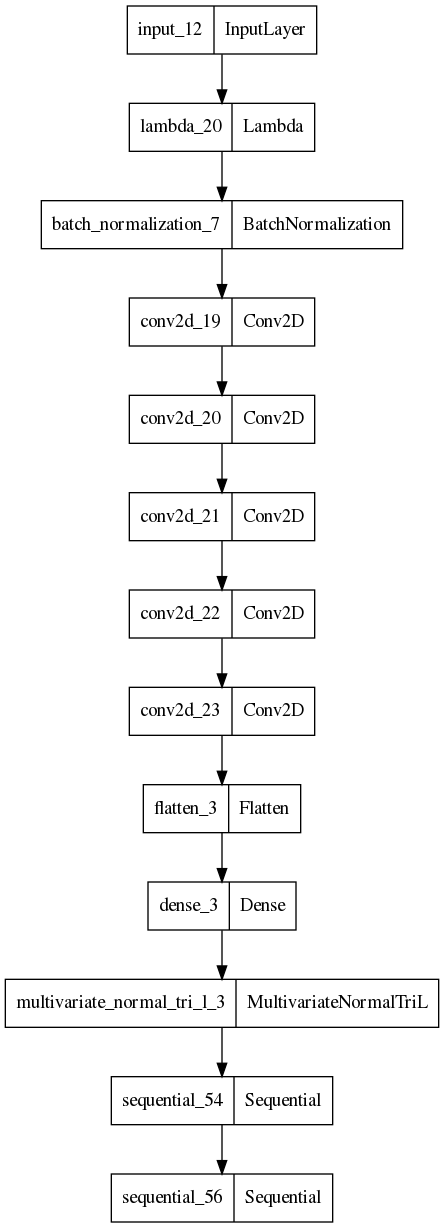

In [125]:
tf.keras.utils.plot_model(vae, 'foo.png')

In [16]:
import matplotlib.pyplot as plt

def display_imgs(x, y=None):
  if not isinstance(x, (np.ndarray, np.generic)):
    x = np.array(x)
  plt.ioff()
  n = x.shape[0]
  fig, axs = plt.subplots(1, n, figsize=(n, 1))
  if y is not None:
    fig.suptitle(np.argmax(y, axis=1))
  for i in range(n):
    axs.flat[i].imshow(np.log(.01 + x[i].squeeze()), interpolation='none', cmap='jet')
    axs.flat[i].axis('off')
  plt.show()
  plt.close()
  plt.ion()

In [90]:
# print('Originals:')
# display_imgs(x)

# print('Decoded Random Samples:')
# display_imgs(xhat.sample())

# print('Decoded Modes:')
# display_imgs(xhat.mode())

# print('Decoded Means:')
# display_imgs(xhat.mean())

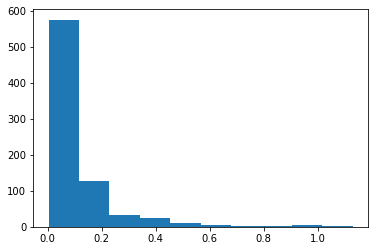

In [91]:
plt.hist(np.array(tf.squeeze(x[5])).ravel());

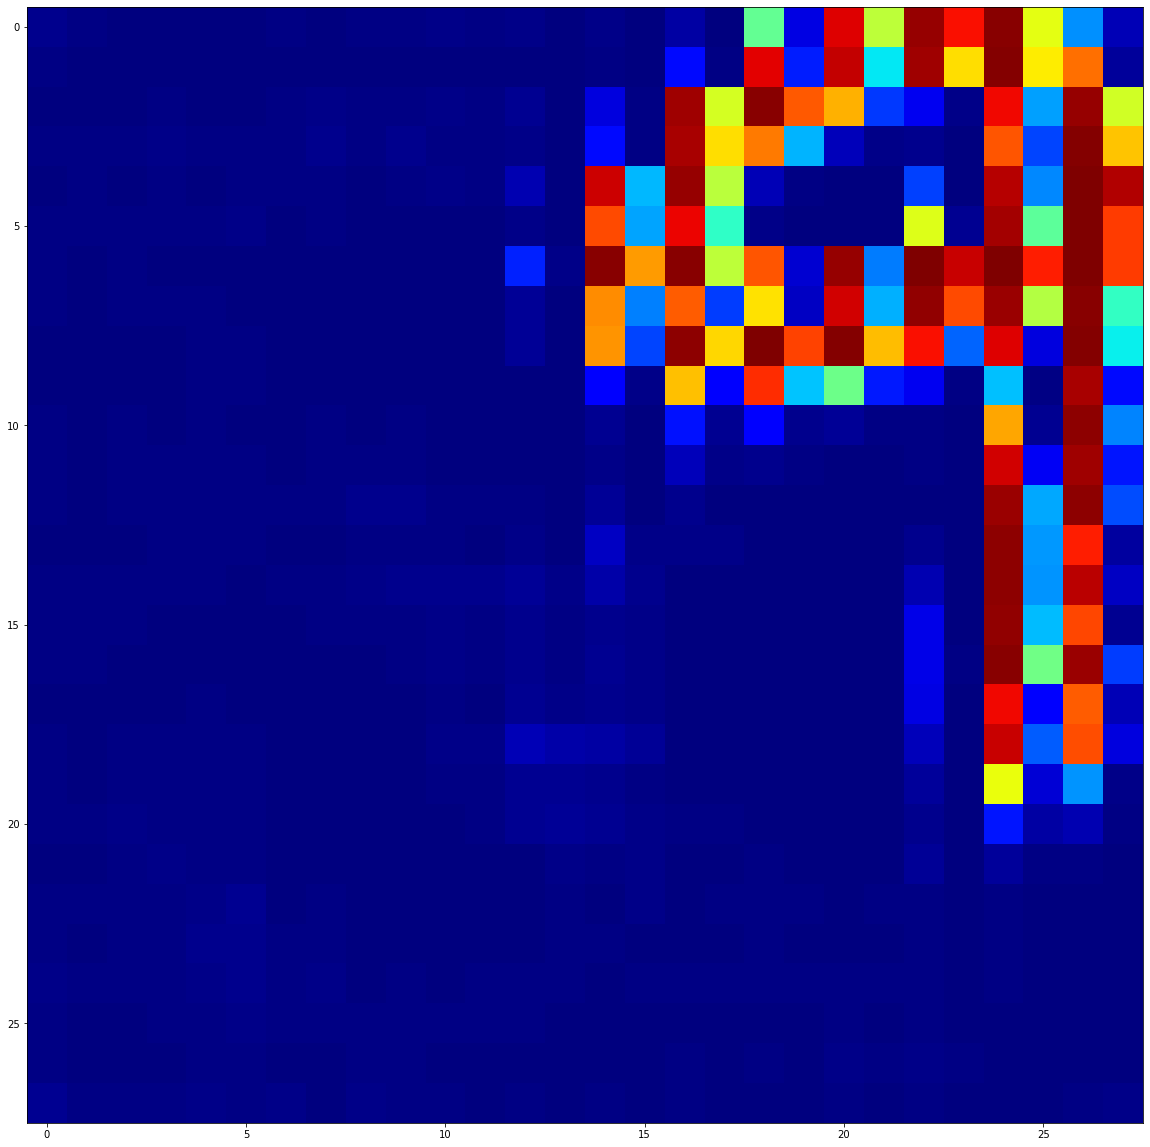

In [393]:
# plt.imshow(np.array((decoder(encoder(x)))).squeeze()[4], cmap = 'jet')

# plt.imshow(np.array(resize((x_orig))).squeeze()[2], cmap = 'jet')

# plt.imshow(np.array(resize(decoder(encoder(x)))).squeeze()[2], cmap = 'jet')

In [397]:
# plt.imshow(np.array(decoder2(decoder(encoder(x))).mean()).squeeze()[0], cmap = 'jet')

Originals:


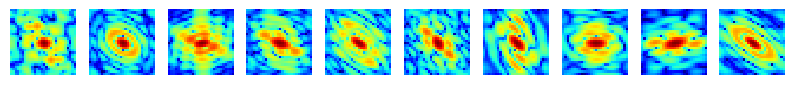

Decoded Random Samples:


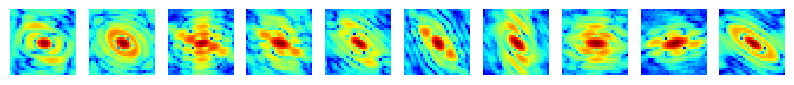

Decoded Modes:


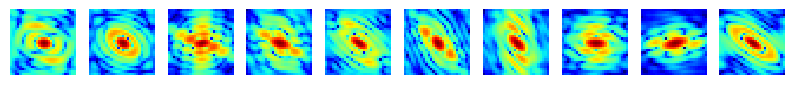

Decoded Means:


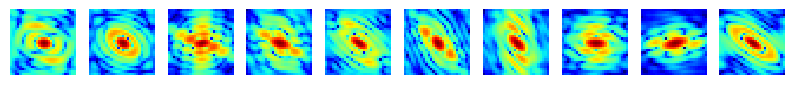

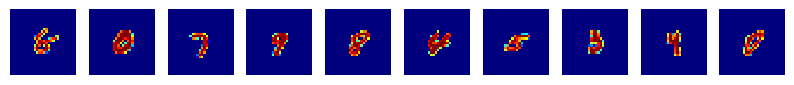

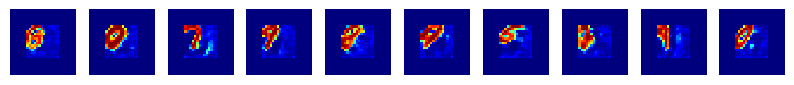

In [17]:
x_orig = next(iter(eval_dataset))[2][10:20]

# We'll just examine ten random digits.
x = next(iter(eval_dataset))[0][10:20]
xhat = vae(x)
assert isinstance(xhat, tfd.Distribution)

import matplotlib as mpl
mpl.rcParams['figure.figsize'] =(20, 30)

print('Originals:')
display_imgs(x)

print('Decoded Random Samples:')
display_imgs(xhat.sample())

print('Decoded Modes:')
display_imgs(xhat.mode())

print('Decoded Means:')
display_imgs(xhat.mean())

display_imgs(resize(x_orig))

display_imgs(resize(decoder(encoder(x).mode())))

In [360]:
# mkdir models/mnist_fourier_vae/

In [362]:
# vae.save('models/mnist_fourier_vae/vae.h5')

# encoder.save('models/mnist_fourier_vae/encoder.h5')

# decoder.save('models/mnist_fourier_vae/decoder.h5')

# decoder2.save('models/mnist_fourier_vae/decoder2.h5')

Randomly Generated Samples:


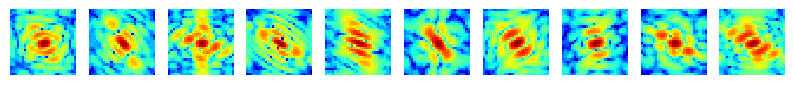

Randomly Generated Modes:


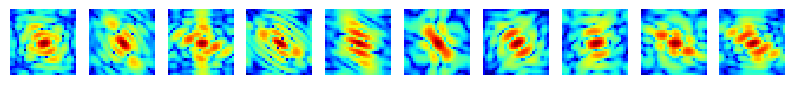

Randomly Generated Means:


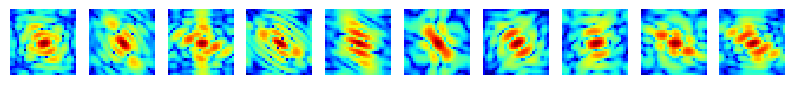

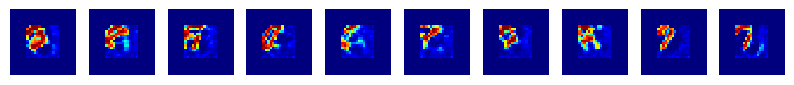

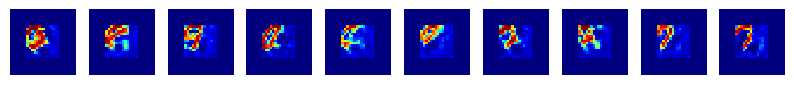

In [21]:
# Now, let's generate ten never-before-seen digits.
z = prior.sample(10)
xtilde = decoder2(decoder(z))
assert isinstance(xtilde, tfd.Distribution)

print('Randomly Generated Samples:')
samp = xtilde.sample()
display_imgs(samp)

print('Randomly Generated Modes:')
display_imgs(xtilde.mode())

print('Randomly Generated Means:')
display_imgs(xtilde.mean())

display_imgs(resize(decoder(z)))

display_imgs(resize(decoder(encoder(samp))))

Randomly Generated Samples:


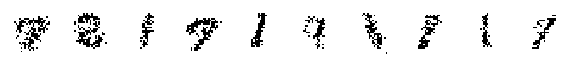

Randomly Generated Modes:


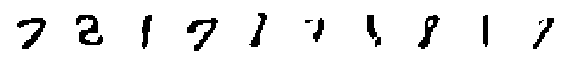

Randomly Generated Means:


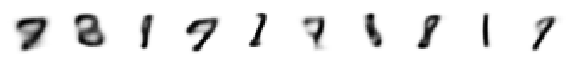

In [455]:
print('Randomly Generated Samples:')
display_imgs(xtilde.sample())

print('Randomly Generated Modes:')
display_imgs(xtilde.mode())

print('Randomly Generated Means:')
display_imgs(xtilde.mean())

In [522]:
import os

import numpy as np
import torch
from pyro.contrib.examples.util import MNIST
import torch.nn as nn
import torchvision.transforms as transforms

import pyro
import pyro.distributions as dist
import pyro.contrib.examples.util  # patches torchvision
from pyro.infer import SVI, Trace_ELBO
from pyro.optim import Adam

In [523]:
pyro.set_rng_seed(0)
# Enable smoke test - run the notebook cells on CI.
smoke_test = 'CI' in os.environ

In [542]:
do_forward(nn.ZeroPad2d((0, 1, 0, 1))(x)).shape

torch.Size([16, 1, 29, 29])

In [543]:
# for loading and batching MNIST dataset
def setup_data_loaders(batch_size=128, use_cuda=False):
    root = './data'
    download = True
    trans = transforms.Compose([transforms.ToTensor(),
                                nn.ZeroPad2d((0, 1, 0, 1)),
                                do_forward])
    train_set = MNIST(root=root, train=True, transform=trans,
                      download=download)
    test_set = MNIST(root=root, train=False, transform=trans)

    kwargs = {'num_workers': 1, 'pin_memory': use_cuda}
    train_loader = torch.utils.data.DataLoader(dataset=train_set,
        batch_size=batch_size, shuffle=True, **kwargs)
    test_loader = torch.utils.data.DataLoader(dataset=test_set,
        batch_size=batch_size, shuffle=False, **kwargs)
    return train_loader, test_loader

In [544]:
import torchvision

In [586]:
class Decoder(nn.Module):
    def __init__(self, z_dim, hidden_dim):
        super().__init__()
        
        # setup the two linear transformations used
        self.fc1 = nn.Linear(z_dim, hidden_dim)
        self.fc21 = nn.Linear(hidden_dim, N**2)
        # setup the non-linearities
        self.softplus = nn.Softplus()
        self.sigmoid = nn.Sigmoid()
        self.z_dim = z_dim
        
        base_depth = 32
        
        
        self.layer1 = nn.Sequential(
            nn.ConvTranspose2d(1, 2 * base_depth, 7, kernel_size=7, stride=1, padding=0),
            nn.BatchNorm2d(2 * base_depth),
            nn.LeakyReLU()
        )
        self.layer2 = nn.Sequential(
            nn.ConvTranspose2d(2 * base_depth, 2 * base_depth, kernel_size=5, stride=1, padding='same'),
            nn.BatchNorm2d(2 * base_depth),
            nn.LeakyReLU())
        
        self.layer3 = nn.Sequential(
            nn.ConvTranspose2d(2 * base_depth, 2 * base_depth, kernel_size=5, stride=2, padding='same'),
            nn.BatchNorm2d(2 * base_depth),
            nn.LeakyReLU()
        )
        self.layer4 = nn.Sequential(
            nn.ConvTranspose2d(2 * base_depth, base_depth, kernel_size=5, stride=1, padding='same'),
            nn.BatchNorm2d(base_depth),
            nn.LeakyReLU())
        
        self.layer5 = nn.Sequential(
            nn.ConvTranspose2d(base_depth, base_depth, kernel_size=5, stride=2, padding='same'),
            nn.BatchNorm2d(base_depth),
            nn.LeakyReLU())
        
        self.layer6 = nn.Sequential(
            nn.ConvTranspose2d(base_depth, base_depth, kernel_size=5, stride=1, padding='same'),
            nn.BatchNorm2d(base_depth),
            nn.LeakyReLU())
        
        self.layer7 = nn.Sequential(
            nn.Conv2d(base_depth, 1, kernel_size=5, stride=1, padding='same'),
            nn.BatchNorm2d(base_depth)  
    def forward(self, z):
        # define the forward computation on the latent z
        # first compute the hidden units
        hidden = self.softplus(self.fc1(z))
        # return the parameter for the output Bernoulli
        # each is of size batch_size x 784
        loc_img = self.sigmoid(self.fc21(hidden)).reshape(-1, N, N)
        blur = torchvision.transforms.GaussianBlur(5, sigma=(.8, .8))

        return blur(loc_img)

In [587]:
import torch.nn.functional as F


In [588]:
class Encoder(nn.Module):
    def __init__(self, z_dim, hidden_dim = 7*7*16):
        super().__init__()
        
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.LeakyReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.LeakyReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        #self.fc1 = nn.Linear(7*7*32, hidden_dim)

#         self.layer1 = nn.Sequential(
#             nn.Conv2d(1, base_depth, kernel_size=5, stride=1, padding='same'),
#             nn.BatchNorm2d(base_depth),
#             nn.LeakyReLU()
#         )
#         self.layer2 = nn.Sequential(
#             nn.Conv2d(base_depth, base_depth, kernel_size=5, stride=2, padding='same'),
#             nn.BatchNorm2d(base_depth),
#             nn.LeakyReLU())
#         self.layer3 = nn.Sequential(
#             nn.Conv2d(base_depth, 2 * base_depth, kernel_size=5, stride=1, padding='same'),
#             nn.BatchNorm2d(2 * base_depth),
#             nn.LeakyReLU()
#         )
#         self.layer4 = nn.Sequential(
#             nn.Conv2d(2 * base_depth, 2 * base_depth, kernel_size=5, stride=2, padding='same'),
#             nn.BatchNorm2d(2 * base_depth),
#             nn.LeakyReLU())
        
        
        
        # setup the three linear transformations used
        #self.fc1 = nn.Linear(784, hidden_dim)
        self.fc21 = nn.Linear(hidden_dim, z_dim)
        self.fc22 = nn.Linear(hidden_dim, z_dim)
        # setup the non-linearities
        self.softplus = nn.Softplus()

    def forward(self, x):
        # define the forward computation on the image x


        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        #hidden = self.softplus(self.fc1(out))
        hidden = self.softplus(out)

#         # first shape the mini-batch to have pixels in the rightmost dimension
#         x = x.reshape(-1, 784)
        # then compute the hidden units
        #hidden = self.softplus(self.fc1(x))
        # then return a mean vector and a (positive) square root covariance
        # each of size batch_size x z_dim
        z_loc = self.fc21(hidden)
        z_scale = torch.exp(self.fc22(hidden))
        return z_loc, z_scale

In [589]:
obs_sigma = .05

# # define the model p(x|z)p(z)
# def model(self, x):
#     # register PyTorch module `decoder` with Pyro
#     pyro.module("decoder", self.decoder)
#     with pyro.plate("data", x.shape[0]):
#         # setup hyperparameters for prior p(z)
#         z_loc = x.new_zeros(torch.Size((x.shape[0], self.z_dim)))
#         z_scale = x.new_ones(torch.Size((x.shape[0], self.z_dim)))
#         # sample from prior (value will be sampled by guide when computing the ELBO)
#         z = pyro.sample("latent", dist.Normal(z_loc, z_scale).to_event(1))
#         # decode the latent code z
#         loc_img = self.decoder(z)
#         # score against actual images
#         #pyro.sample("obs", dist.Bernoulli(loc_img).to_event(1), obs=x.reshape(-1, 784))
#         pyro.sample("obs", dist.Normal(loc_img, obs_sigma).to_event(1), obs=x.reshape(-1, 784))

In [590]:
# # define the guide (i.e. variational distribution) q(z|x)
# def guide(self, x):
#     # register PyTorch module `encoder` with Pyro
#     pyro.module("encoder", self.encoder)
#     with pyro.plate("data", x.shape[0]):
#         # use the encoder to get the parameters used to define q(z|x)
#         z_loc, z_scale = self.encoder(x)
#         # sample the latent code z
#         pyro.sample("latent", dist.Normal(z_loc, z_scale).to_event(1))

In [591]:
class VAE(nn.Module):
    # by default our latent space is 50-dimensional
    # and we use 400 hidden units
    def __init__(self, z_dim=50, hidden_dim=7*7*16, use_cuda=False):
        super().__init__()
        # create the encoder and decoder networks
        self.encoder = Encoder(z_dim, hidden_dim)
        self.decoder = Decoder(z_dim, hidden_dim)

        if use_cuda:
            # calling cuda() here will put all the parameters of
            # the encoder and decoder networks into gpu memory
            self.cuda()
        self.use_cuda = use_cuda
        self.z_dim = z_dim

    # define the model p(x|z)p(z)
    def model(self, x):
        #x = do_forward(x)
        # register PyTorch module `decoder` with Pyro
        pyro.module("decoder", self.decoder)
        with pyro.plate("data", x.shape[0]):
            # setup hyperparameters for prior p(z)
            z_loc = x.new_zeros(torch.Size((x.shape[0], self.z_dim)))
            z_scale = x.new_ones(torch.Size((x.shape[0], self.z_dim)))
            # sample from prior (value will be sampled by guide when computing the ELBO)
            z = pyro.sample("latent", dist.Normal(z_loc, z_scale).to_event(1))
            # decode the latent code z

            loc_img = do_forward(
                    self.decoder(z)
                ).reshape(-1, N**2)
            # score against actual images
            #pyro.sample("obs", dist.Bernoulli(loc_img).to_event(1), obs=x.reshape(-1, 784))
            return pyro.sample("obs", dist.Normal(loc_img, obs_sigma).to_event(1),
                               obs=x.reshape(-1, N**2))

    # define the guide (i.e. variational distribution) q(z|x)
    def guide(self, x):
        #x = do_forward(x)
        # register PyTorch module `encoder` with Pyro
        pyro.module("encoder", self.encoder)
        with pyro.plate("data", x.shape[0]):
            # use the encoder to get the parameters used to define q(z|x)
            z_loc, z_scale = self.encoder(x)
            # sample the latent code z
            pyro.sample("latent", dist.Normal(z_loc, z_scale).to_event(1))

    # define a helper function for reconstructing images
    def reconstruct_img(self, x):
        # encode image x
        z_loc, z_scale = self.encoder(x)
        # sample in latent space
        z = dist.Normal(z_loc, z_scale).sample()
        # decode the image (note we don't sample in image space)
        loc_img = self.decoder(z)
        return loc_img

In [592]:
do_forward(x[10]).max()

tensor(0.4922)

In [593]:
vae = VAE()

In [594]:
optimizer = Adam({"lr": 1.0e-3})

In [595]:
svi = SVI(vae.model, vae.guide, optimizer, loss=Trace_ELBO())

In [596]:
def train(svi, train_loader, use_cuda=False):
    # initialize loss accumulator
    epoch_loss = 0.
    # do a training epoch over each mini-batch x returned
    # by the data loader
    for x, _ in train_loader:
        # if on GPU put mini-batch into CUDA memory
        if use_cuda:
            x = x.cuda()
        # do ELBO gradient and accumulate loss
        epoch_loss += svi.step(x)

    # return epoch loss
    normalizer_train = len(train_loader.dataset)
    total_epoch_loss_train = epoch_loss / normalizer_train
    return total_epoch_loss_train

In [597]:
def evaluate(svi, test_loader, use_cuda=False):
    # initialize loss accumulator
    test_loss = 0.
    # compute the loss over the entire test set
    for x, _ in test_loader:
        # if on GPU put mini-batch into CUDA memory
        if use_cuda:
            x = x.cuda()
        # compute ELBO estimate and accumulate loss
        test_loss += svi.evaluate_loss(x)
    normalizer_test = len(test_loader.dataset)
    total_epoch_loss_test = test_loss / normalizer_test
    return total_epoch_loss_test

In [599]:
# Run options
LEARNING_RATE = 1.0e-3
USE_CUDA = False

# Run only for a single iteration for testing
NUM_EPOCHS = 1 if smoke_test else 20
TEST_FREQUENCY = 5

In [600]:
N = 29

In [ ]:
from xrdc.source_separation import *

In [ ]:
import torchvision.transforms as T
import matplotlib.pyplot as plt

In [510]:
# from skimage.transform import resize

# def do_resize(x):
#     padx = pady = x.shape[-1] // 2
#     transform = nn.AvgPool2d(2)
#     padder = nn.ZeroPad2d((padx // 2, padx // 2 + 1, padx // 2, padx // 2 + 1))
# #     resized = torch.nn.functional.pad(
# #             transform(x) / 4
# # #             resize(x, newshape)
# #         , p2d, "constant", 0)
#     resized = padder(
#         transform(x)
#     )
#     return resized

# def do_forward(x):
#     X = (fft.fft2(do_resize(x))) 
#     psd = torch.real(torch.conj(X) * X) / N**2
    
#     #return psd
#     amplitude = torch.sqrt(fft.fftshift(psd, (-1, -2)))
#     return amplitude
#     #return amplitude / torch.max(torch.max(amplitude, dim = -1).values, dim = -1).values[:, None, None]
# from torch import fft


# from torch import fft

# # plt.imshow(resized)

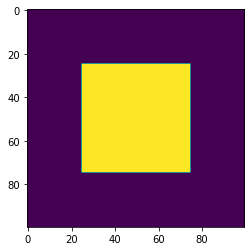

In [135]:
plt.imshow(do_resize(np.ones_like(arr)))

In [733]:
%pdb

Automatic pdb calling has been turned ON


In [750]:
do_forward(x)

tensor([[[[4.6791e-04, 4.5581e-04, 4.1331e-04,  ..., 3.3099e-04,
           4.1331e-04, 4.5581e-04],
          [3.2929e-04, 3.1233e-04, 2.8045e-04,  ..., 2.5971e-04,
           3.0697e-04, 3.3028e-04],
          [7.6540e-05, 6.7093e-05, 8.1178e-05,  ..., 7.0199e-05,
           8.2718e-05, 8.7515e-05],
          ...,
          [4.9072e-05, 7.4506e-05, 6.1123e-05,  ..., 2.1204e-04,
           5.7752e-05, 2.2651e-05],
          [7.6541e-05, 8.7515e-05, 8.2719e-05,  ..., 1.3504e-04,
           8.1177e-05, 6.7093e-05],
          [3.2929e-04, 3.3028e-04, 3.0697e-04,  ..., 2.2778e-04,
           2.8045e-04, 3.1233e-04]]],


        [[[1.1100e-03, 9.8271e-04, 6.5919e-04,  ..., 2.9786e-04,
           6.5919e-04, 9.8271e-04],
          [1.1219e-03, 9.5447e-04, 6.1333e-04,  ..., 2.1285e-04,
           6.0780e-04, 9.8800e-04],
          [1.0848e-03, 1.0064e-03, 6.6471e-04,  ..., 8.1590e-05,
           3.8125e-04, 8.1235e-04],
          ...,
          [8.7594e-04, 4.5448e-04, 1.4526e-04,  ..., 5.04

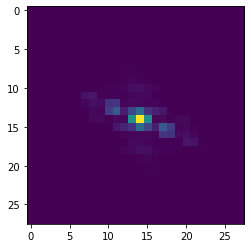

In [65]:
plt.imshow(
    fftshift(power(fft2(x[3][0].numpy()))))

In [706]:
N = 28

In [704]:
(resized * resized).mean()

0.020570649

In [786]:
do_resize(x[0][0]).mean()

tensor(0.0216)

In [143]:
do_forward(x).min()

tensor(0.0002)

In [142]:
x.max()

tensor(1.)

In [722]:
resized.mean()

0.029960735

In [771]:
do_forward(x).shape

torch.Size([16, 1, 28, 28])

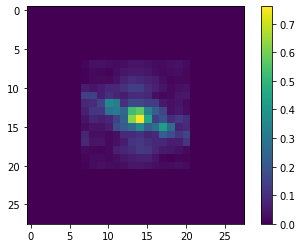

In [164]:
plt.imshow(do_resize(x)[3][0])
plt.colorbar()

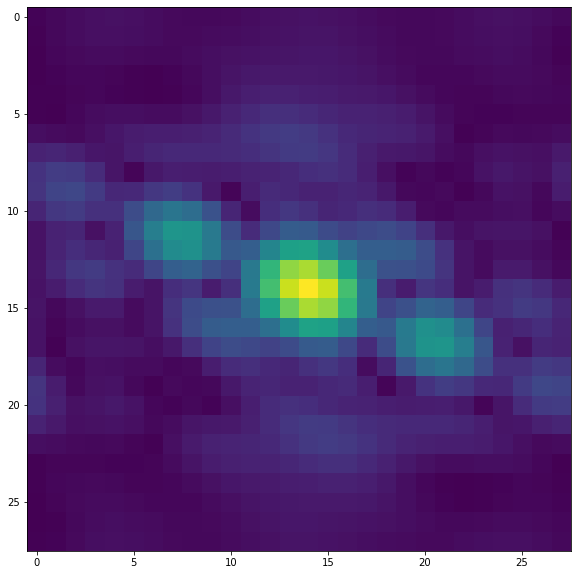

In [866]:
plt.imshow(do_forward(x)[3][0])

In [871]:
torch.__version__

'1.10.2+cu102'

In [868]:
x[3][0].shape

torch.Size([28, 28])

In [870]:
plt.imshow(do_forward(x[3][0]))

IndexError: Dimension out of range (expected to be in range of [-2, 1], but got -3)

> /home/ollie/anaconda3/lib/python3.8/site-packages/torch/nn/modules/pooling.py(616)forward()
    614 
    615     def forward(self, input: Tensor) -> Tensor:
--> 616         return F.avg_pool2d(input, self.kernel_size, self.stride,
    617                             self.padding, self.ceil_mode, self.count_include_pad, self.divisor_override)
    618 

ipdb> c


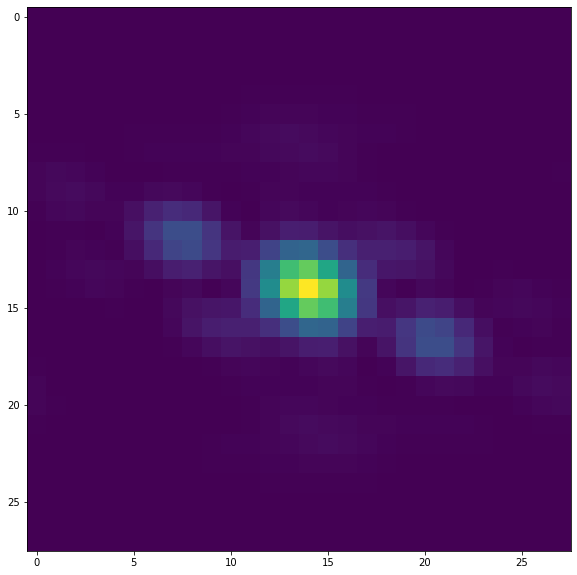

In [769]:
plt.imshow(do_forward(x[3][0]))

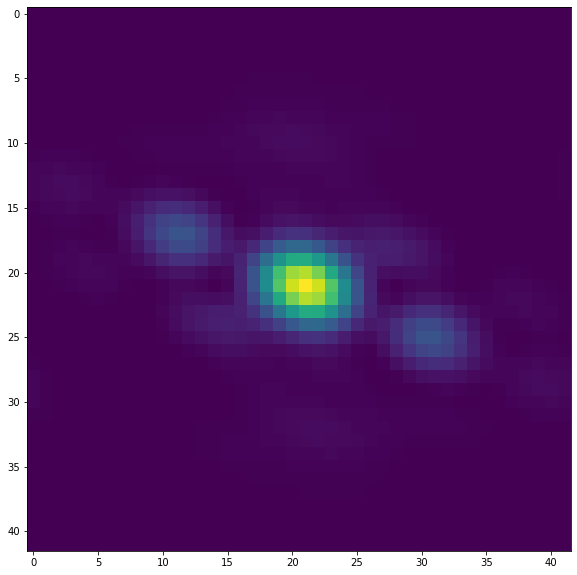

In [752]:
plt.imshow(do_forward(x[3][0]))

In [ ]:
(resized * resized)

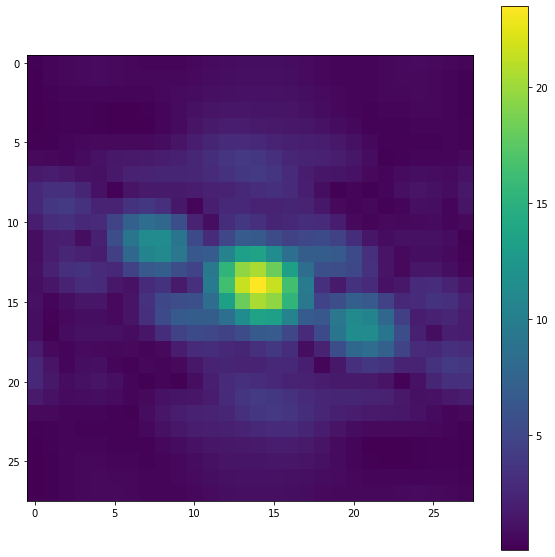

In [700]:
plt.imshow(
    fftshift(
        np.sqrt(power(fft2(resized)))))
plt.colorbar()

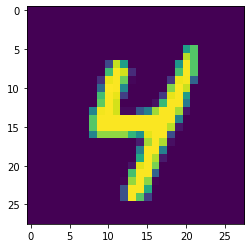

In [66]:
plt.imshow(x[3].reshape((28, 28)).detach().numpy())

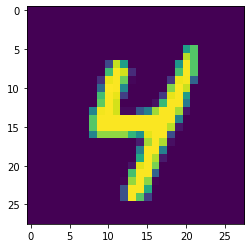

In [130]:
plt.imshow(x[3].reshape((28, 28)).detach().numpy())

In [602]:
plt.imshow(x.cpu()[3].reshape((28, 28)), cmap = 'jet')
plt.colorbar()

RuntimeError: shape '[28, 28]' is invalid for input of size 841

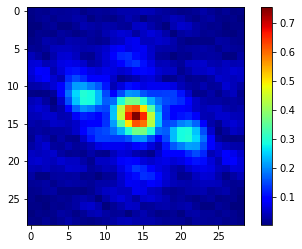

In [608]:
plt.imshow(do_forward(vae.reconstruct_img(x)).cpu().detach().numpy()[3], cmap = 'jet')
plt.colorbar()

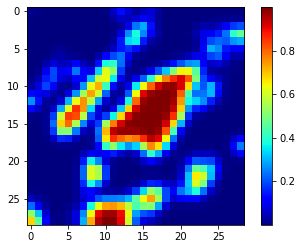

In [613]:
plt.imshow(vae.reconstruct_img(x)[15].reshape((N, N)).cpu().detach().numpy(), cmap = 'jet')
plt.colorbar()

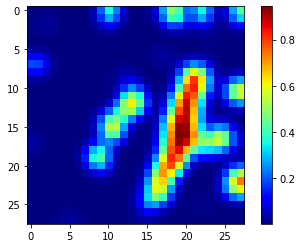

In [456]:
plt.imshow(vae.reconstruct_img(x)[3].reshape((28, 28)).cpu().detach().numpy(), cmap = 'jet')
plt.colorbar()

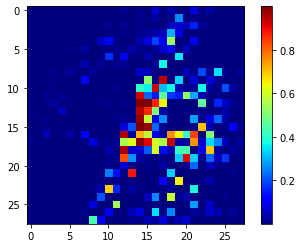

In [351]:
plt.imshow(vae.reconstruct_img(x)[3].reshape((28, 28)).detach().numpy(), cmap = 'jet')
plt.colorbar()

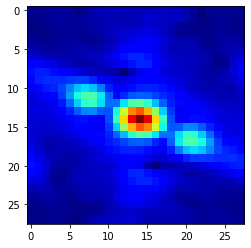

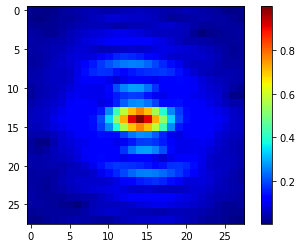

In [317]:
plt.imshow(vae.reconstruct_img(x)[2].reshape((28, 28)).detach().numpy(), cmap = 'jet')
plt.colorbar()

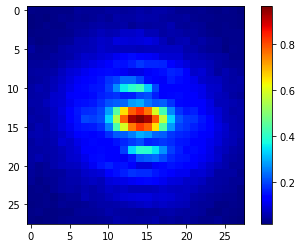

In [300]:
plt.imshow(vae.reconstruct_img(x)[2].reshape((28, 28)).detach().numpy(), cmap = 'jet')
plt.colorbar()

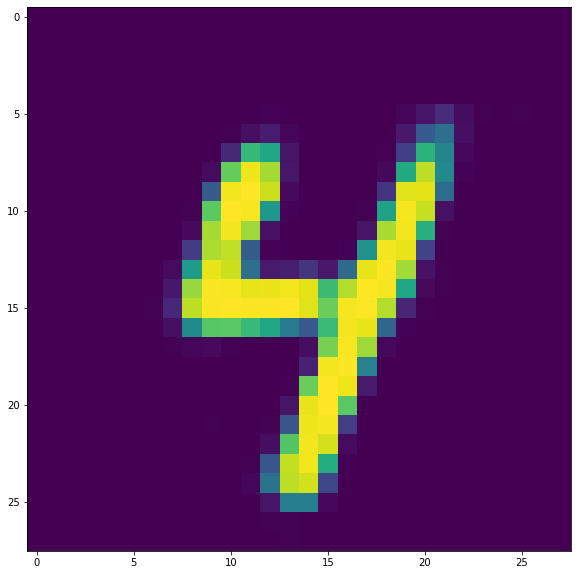

In [671]:
plt.imshow(vae.reconstruct_img(x)[3].reshape((28, 28)).detach().numpy())

In [637]:
# vae.reconstruct_img(x[0])[0].reshape((28, 28)).min()

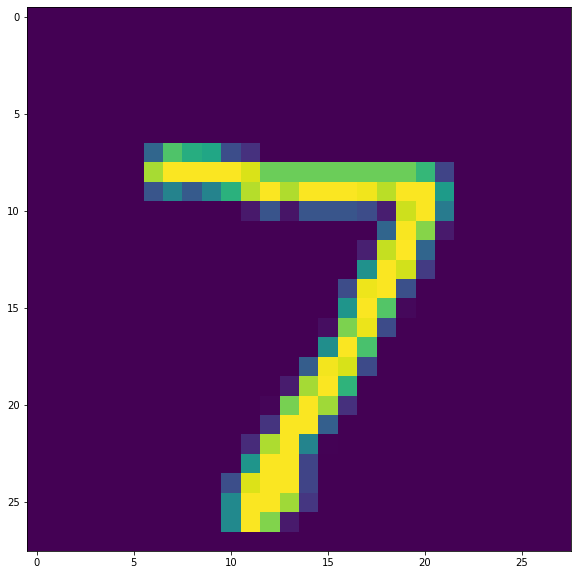

In [638]:
plt.imshow(res[0][0])

In [639]:
test_elbo

[169.84870153808595, 373.8694891296387, 402.4586141204834]

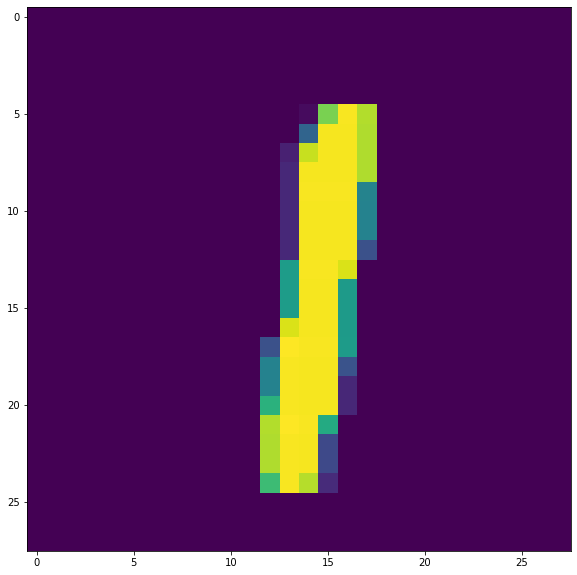

In [640]:
plt.imshow(x[0][0])